#                                    This Notebook For TechnoHacks

#                                    Task 1 : Predicting House Prices

# Use a dataset containing information about house features to predict their sale prices.

# Import Important Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data & Print first 5 rows

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# print data information 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# check if data have null values 

In [6]:
data.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


# print describtion of data

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# print summation of null data in every column

In [8]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# fill null data in column "lotfrontage" with mean value

In [9]:
data['LotFrontage'] = data['LotFrontage'].fillna( data['LotFrontage'].mean() )

In [10]:
data['LotFrontage'].head(11)

0     65.000000
1     80.000000
2     68.000000
3     60.000000
4     84.000000
5     85.000000
6     75.000000
7     70.049958
8     51.000000
9     50.000000
10    70.000000
Name: LotFrontage, dtype: float64

# fill null value --> "pave" 

In [11]:
#data.replace(np.nan, ' ')
#data['Alley'].fillna('Pave')
data_str = data.loc[:730, data.dtypes == object]
data_str = data_str.replace('', np.nan)
data_str = data_str.fillna('Pave')
data.update(data_str)


# # fill null value --> "Grvl" 

data_str = data.loc[731:,data.dtypes == object]
data_str = data_str.replace('', np.nan)
data_str = data_str.fillna('Grvl')
data.update(data_str)

# Drop null values in data 

In [12]:
data=data.dropna()

# Draw barplot between BedroomAbvGr and LotArea

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


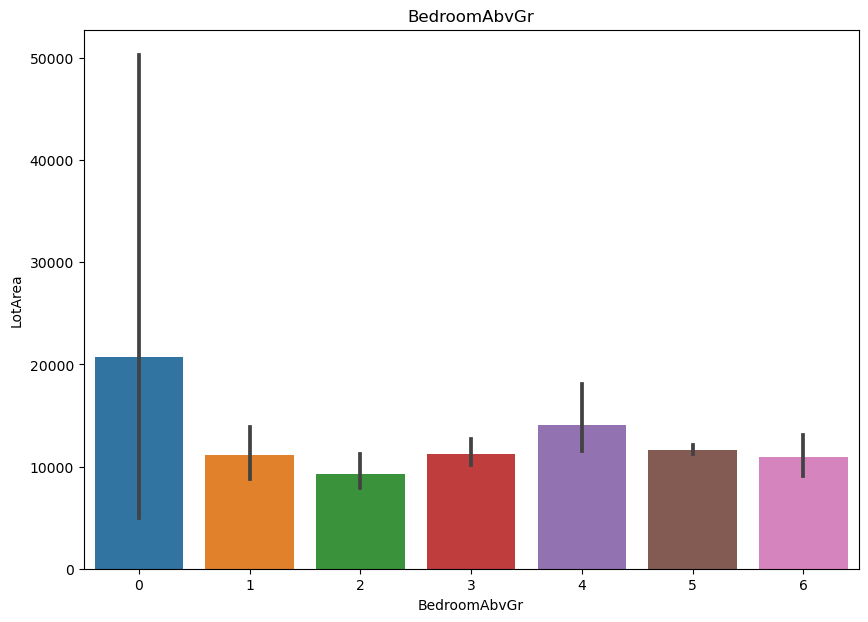

In [14]:
plt.figure(figsize=(10, 7))
plt.title("BedroomAbvGr")
sns.barplot('BedroomAbvGr', 'LotArea', data=data)
plt.xlabel('BedroomAbvGr', )
plt.ylabel('LotArea')
plt.show()

# Draw Scatterplot between FullBath and LotArea

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


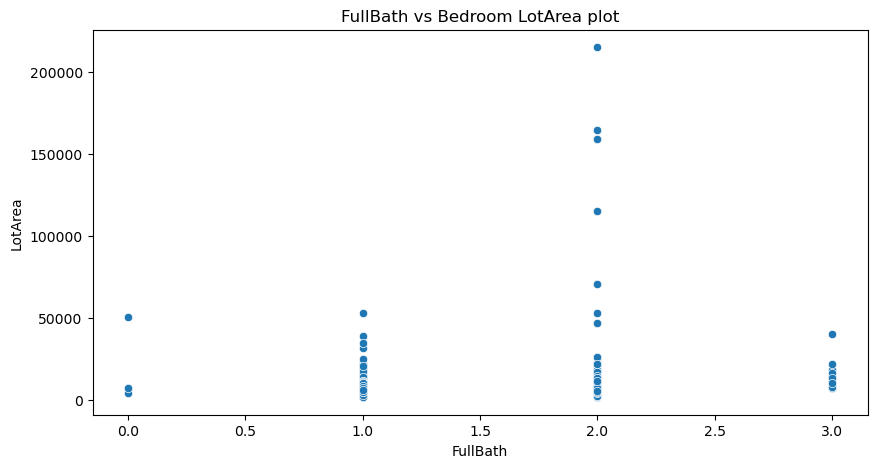

In [15]:
plt.figure(figsize=(10, 5))

sns.scatterplot('FullBath', 'LotArea',data=data)
plt.title("FullBath vs Bedroom LotArea plot")

plt.xlabel("FullBath")
plt.ylabel('LotArea')
plt.show()

# Draw Implot between LotArea and SalePrice

<Figure size 1000x700 with 0 Axes>

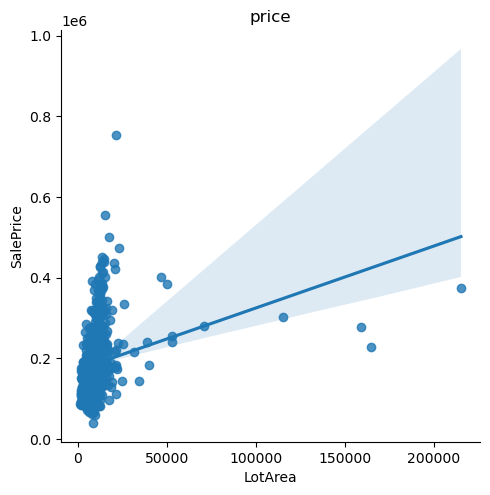

In [16]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="LotArea", y="SalePrice", data=data);
plt.title("price")
plt.show()

# Draw Histogram for all column in data

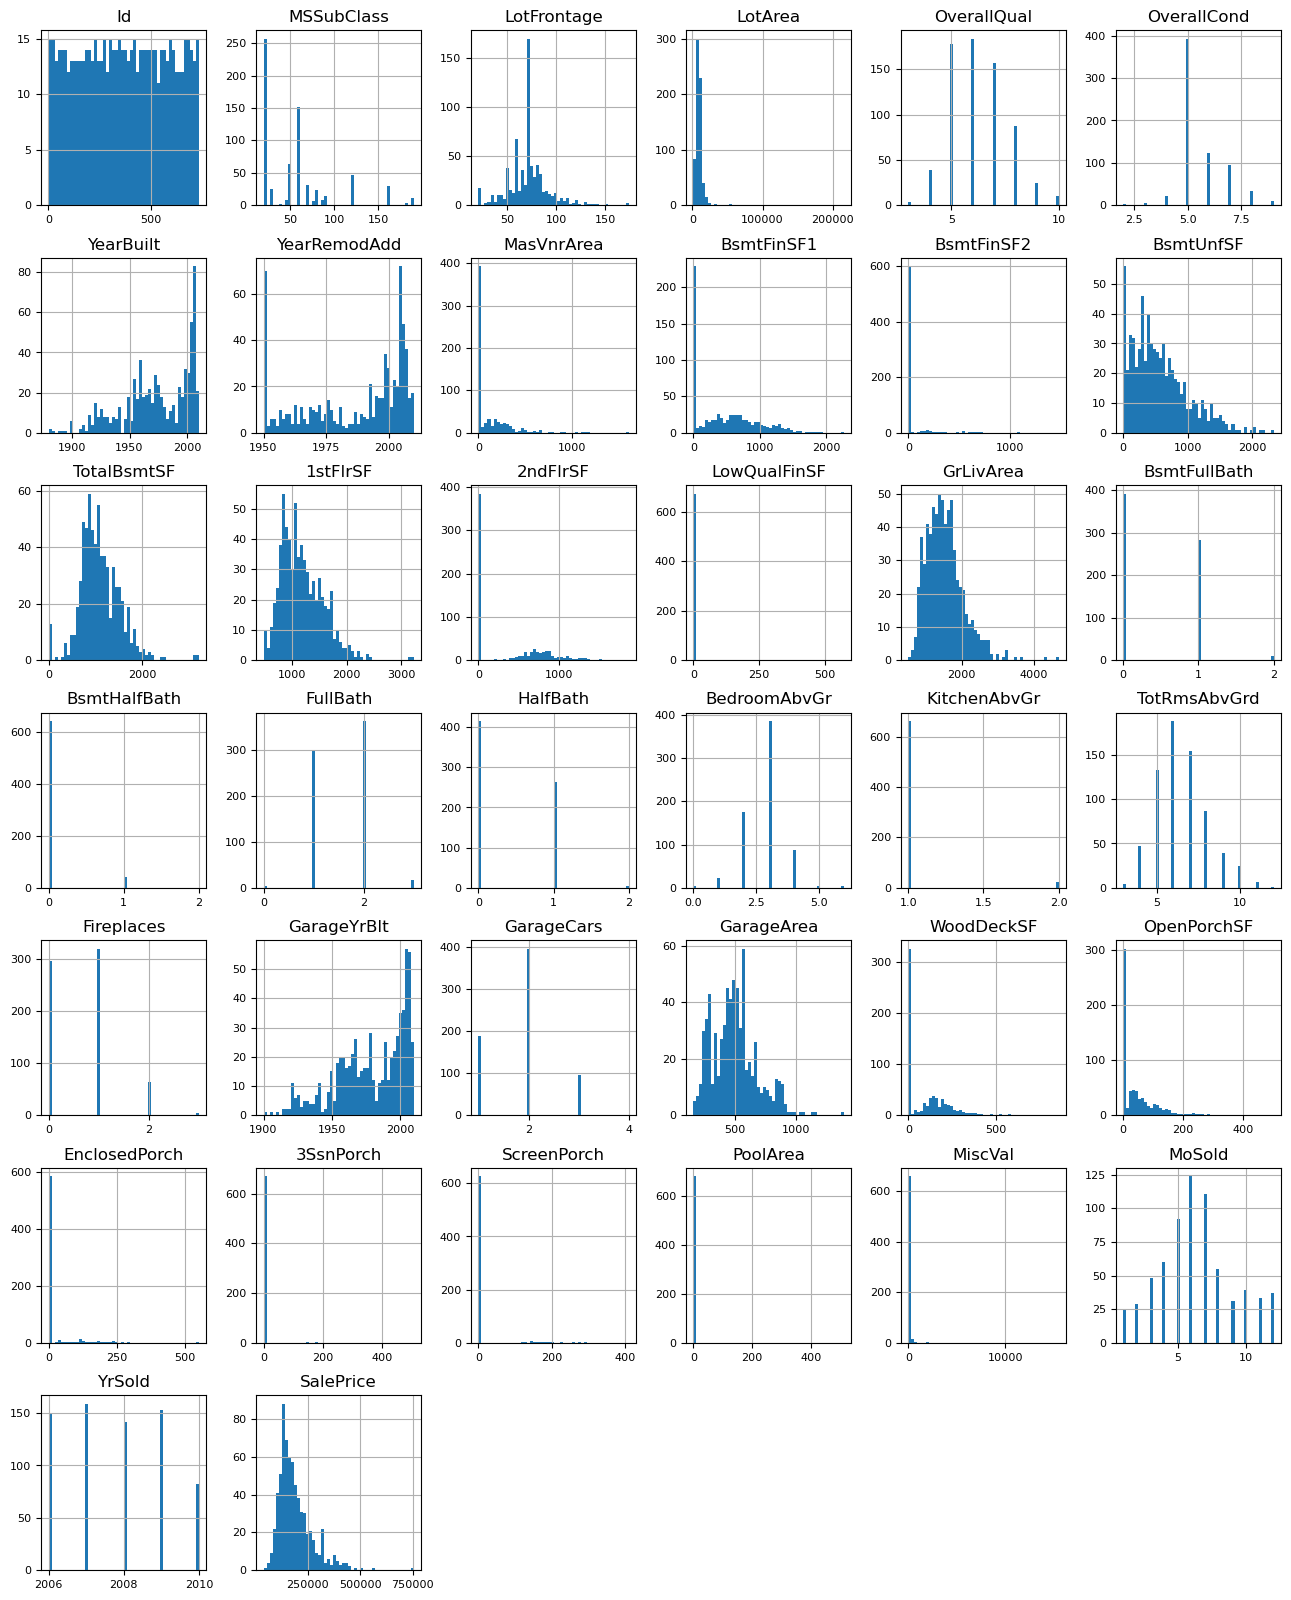

In [17]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Draw barplot to all column

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

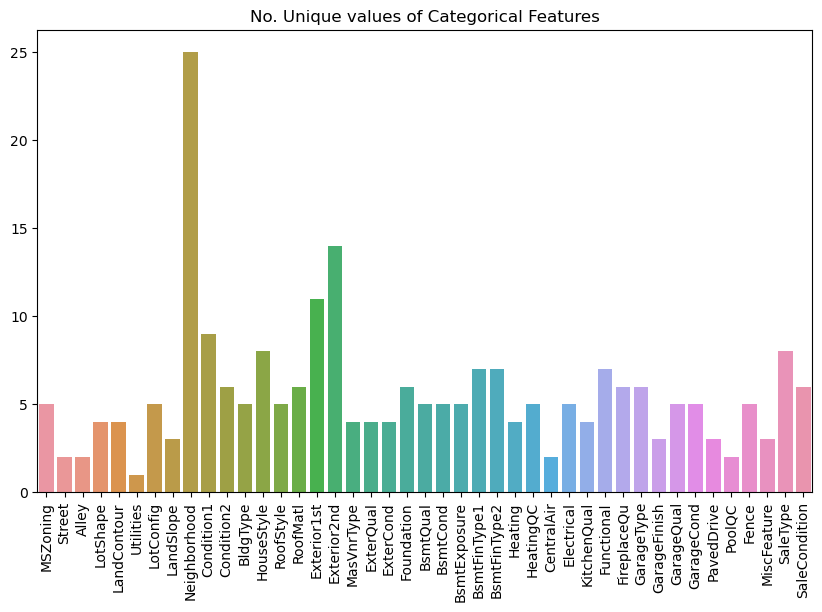

In [34]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values = []
for col in object_cols:
    unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

# Draw heatmap for data

<Axes: >

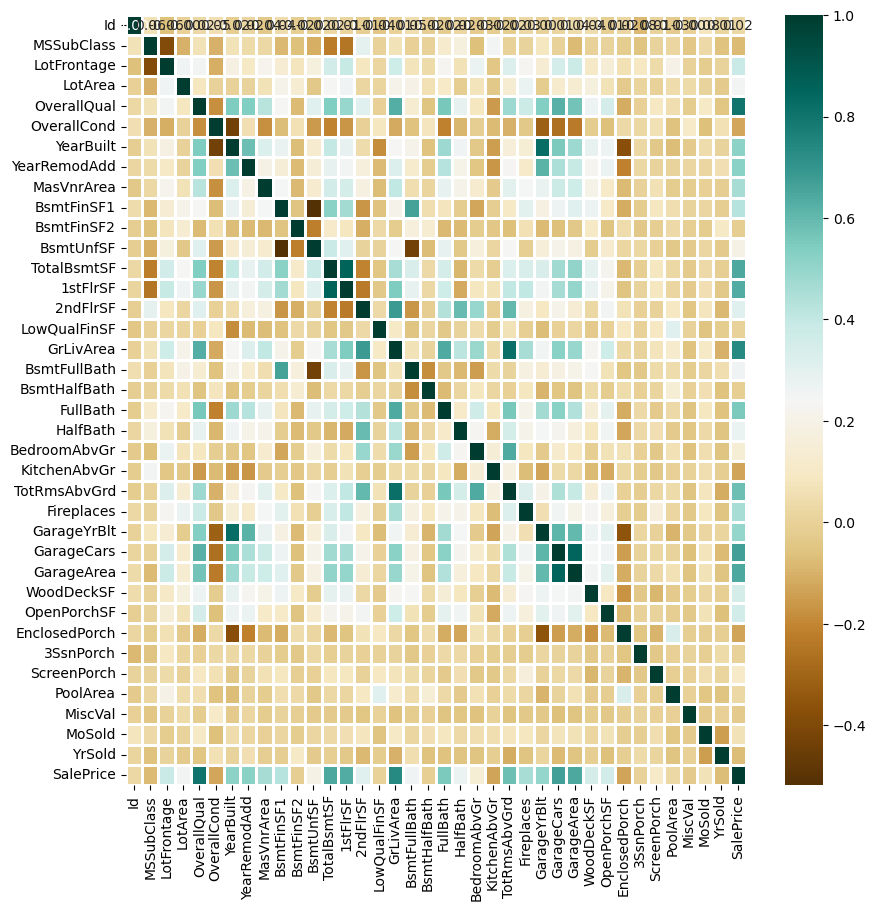

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

# Draw distplot for SalePrice

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='SalePrice', ylabel='Density'>

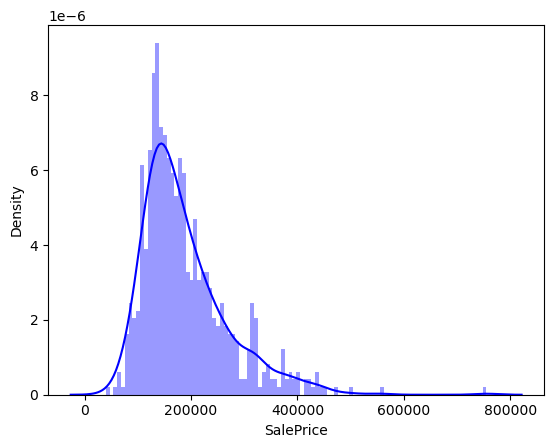

In [20]:

sns.distplot(data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4})

# Draw lineplot between 1stFlrSF,2ndFlrSF and BedroomAbvGr,KitchenAbvGr

<Axes: xlabel='1stFlrSF', ylabel='2ndFlrSF'>

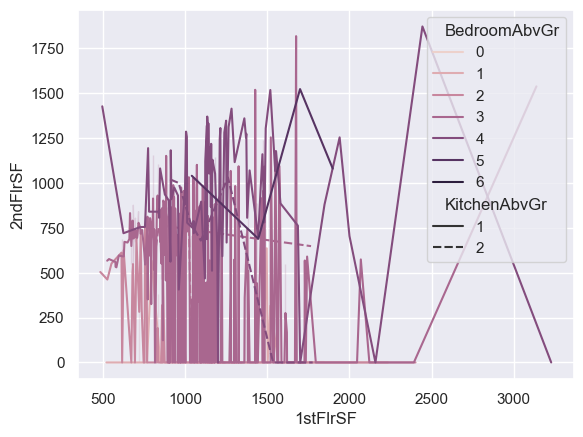

In [46]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="1stFlrSF", y="2ndFlrSF",hue="BedroomAbvGr", style="KitchenAbvGr",data=data)

# Draw relplot between GarageCars,GarageArea and MiscVal,YrSold

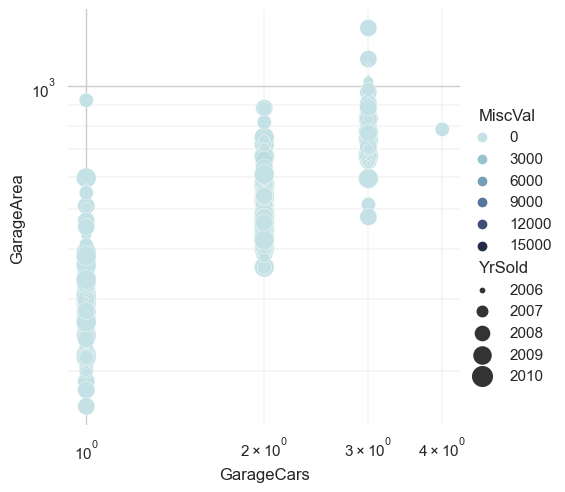

In [62]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=data,x="GarageCars", y="GarageArea",hue="MiscVal", size="YrSold",palette=cmap, sizes=(10, 200),)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Split columns into category "object"

In [21]:
from sklearn.preprocessing import OneHotEncoder

s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  43


# Machine Learning 

# import important libarary to use LinearRegression 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model= LinearRegression()

# Set X to features and y to output 'price'

In [26]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [27]:
y

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
726    222000
727    194500
728    110000
729    103000
730    236500
Name: SalePrice, Length: 684, dtype: int64

# Dividing the data into test and train values 

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# make fitting to linear regression model to get prediction 

# calculate model accurcy using 'mean absolute percentage error'

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error    
try:
    model = LinearRegression()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_valid)
    print('predictions')
    print(y_pred)
    print('mean absolute percentage error',mean_absolute_percentage_error(Y_valid, y_pred))
except ValueError as e:
    print('Error:', e)

predictions
[124146.92315372 258463.71735901  74802.86523463 236902.37629301
 128045.51141966 154662.0937939  142422.4745303  193107.60505096
 125329.71269855 348042.23314593 149726.32070669 155127.09271691
 153177.16456281  92578.41751481 130684.78403326 119590.29372404
 199981.45633428 -65093.76078494 110261.36902711 318747.7206642
 250413.07891555 253268.16181621 276838.69266262 122596.03349648
 224769.33820037 357153.15437928 150695.75624756 167029.42743291
 173259.16297157 132152.76556342 333812.12381968 148589.06705666
 218318.63471208 130888.73784024 133390.08773728 235092.91714725
 130450.95930085 185733.71418732 193414.92212146 221691.41853392
 110662.77913139 231953.5143296  147631.60904058 130793.54206956
 226278.47558896 255594.89208284 335793.63083959 255646.94741151
 155872.81072537 177228.16603852 215438.11552781 251557.54497551
 198938.25852881 163808.10818651 218275.67696002 133534.73616816
 148849.35506079 198245.94516173 209355.53452516 140896.50077063
 112897.833761